In [ ]:
# This walks through the steps in Chpt. 2 of 'Hands-On Machine Learning with Scikit-Learn and 
# TensorFlow' by Géron, but with a different dataset, obtained at
# https://www.kaggle.com/tunguz/covid19-vaccinations-in-the-united-states-county

# Created from parent 2021 Nov. 24 by E.S.

In [11]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
from zlib import crc32

%matplotlib inline

In [3]:
STEM = "/Users/bandari/Documents/git.repos/ml/"
DATA_PATH = os.path.join(STEM, "datasets")

In [4]:
def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(DATA_PATH, "mount_everest_deaths.csv")
    return pd.read_csv(csv_path)

In [5]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [7]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
df = load_data()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             310 non-null    int64  
 1   Name            310 non-null    object 
 2   Date            310 non-null    object 
 3   Age             160 non-null    float64
 4   Expedition      271 non-null    object 
 5   Nationality     309 non-null    object 
 6   Cause of death  296 non-null    object 
 7   Location        291 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 19.5+ KB


In [10]:
df.describe()

,No.,Age
count,310.000000,160.000000
mean,155.500000,40.356250
std,89.633513,12.244545
min,1.000000,19.000000
25%,78.250000,31.750000
50%,155.500000,38.000000
75%,232.750000,48.000000
max,310.000000,85.000000


array([[<AxesSubplot:title={'center':'No.'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

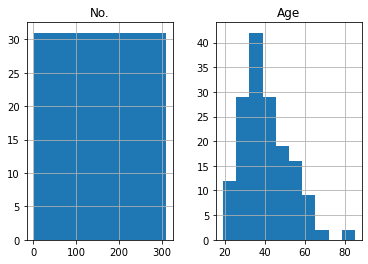

In [13]:
df.hist()

In [ ]:
# turn some string quantities into numerical ones

In [ ]:
# make correlation plots

In [14]:
train_set, test_set = split_train_test(df, 0.2)

In [28]:
data_with_id = covid_data.reset_index()
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [29]:
# p. 53

from sklearn.model_selection import train_test_split

In [31]:
train_set, test_set = train_test_split(data_with_id, test_size=0.2, random_state=42)

In [62]:
# p. 54

housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

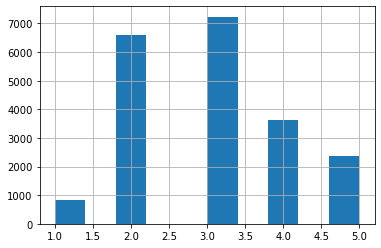

In [63]:
housing["income_cat"].hist()

In [74]:
# p. 55

from sklearn.model_selection import StratifiedShuffleSplit

In [75]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [76]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)